___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-2 (CNN)<br><br>Image Classification with CNN<br><h1>

# Task and Dataset Info

Welcome to second assignment of Deep learning lesson. Follow the instructions and complete the assignment.

**Build an image classifier with Convolutional Neural Networks for the Fashion MNIST dataset. This data set includes 10 labels of different clothing types with 28 by 28 *grayscale* images. There is a training set of 60,000 images and 10,000 test images.**

    Label	Description
    0	    T-shirt/top
    1	    Trouser
    2	    Pullover
    3	    Dress
    4	    Coat
    5	    Sandal
    6	    Shirt
    7	    Sneaker
    8	    Bag
    9	    Ankle boot

In [1]:
try:
    import jupyter_black
    jupyter_black.load()
except ImportError:
    print("You can safely ignore this message.")

You can safely ignore this message.


In [2]:
!python --version

Python 3.10.16


In [3]:
import os

# Set TF log level to ignore INFOs
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "1"

# Import Libraries

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow import keras

# import warnings
# warnings.filterwarnings("ignore")
# warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10, 6)

sns.set_style("whitegrid")
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option("display.max_columns", None)

In [5]:
import tensorflow as tf

if tf.config.list_physical_devices("GPU"):
    print("GPU support is enabled for this session.")
else:
    print("CPU will be used for this session.")

CPU will be used for this session.


In [6]:
print(tf.__version__)

2.18.0


In [7]:
# Set the seed using keras.utils.set_random_seed. This will set:
# 1) `numpy` seed
# 2) `tensorflow` random seed
# 3) `python` random seed
SEED = 42
keras.utils.set_random_seed(SEED)

# This will make TensorFlow ops as deterministic as possible, but it will
# affect the overall performance, so it's not enabled by default.
# `enable_op_determinism()` is introduced in TensorFlow 2.9.
tf.config.experimental.enable_op_determinism()

# Recognizing and Understanding Data

**TASK 1: Run the code below to download the dataset using Keras.**

In [8]:
from tensorflow.keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [9]:
print(f"There are {len(x_train)} images in the training dataset")
print(f"There are {len(x_test)} images in the test dataset")

There are 60000 images in the training dataset
There are 10000 images in the test dataset


In [10]:
# Checking the shape of one image
x_train[5].shape

(28, 28)

In [11]:
x_train[5]

array([[  0,   0,   0,   0,   1,   0,   0,   0,   0,  22,  88, 188, 172,
        132, 125, 141, 199, 143,   9,   0,   0,   0,   1,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   1,   0,   0,  20, 131, 199, 206, 196, 202, 242,
        255, 255, 250, 222, 197, 206, 188, 126,  17,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   1,   0,  35, 214, 191, 183, 178, 175, 168, 150,
        162, 159, 152, 158, 179, 183, 189, 195, 185,  82,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 170, 190, 172, 177, 176, 171, 169, 162,
        155, 148, 154, 169, 174, 175, 175, 177, 183, 188,  12,   0,   0,
          0,   0],
       [  0,   0,   0,   0,  25, 194, 180, 178, 174, 184, 187, 189, 187,
        184, 181, 189, 200, 197, 193, 190, 178, 175, 194,  90,   0,   0,
          0,   0],
       [  0,   0,   0,   0,  42, 218, 191, 197, 208, 204, 211, 209, 210,
        212, 211, 214, 215, 213, 214, 211, 211, 191, 200, 158,   0,   0,
          0,   0],
       [  

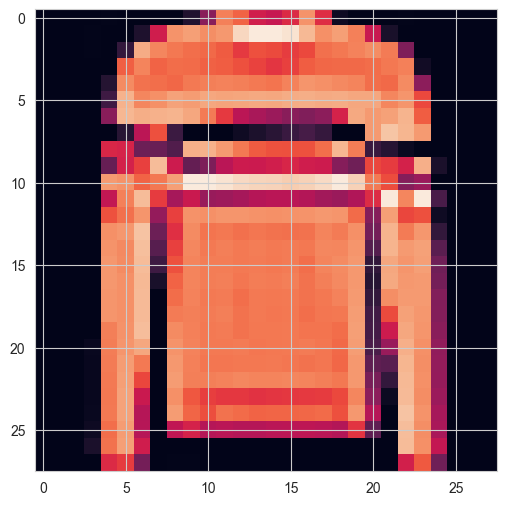

In [12]:
plt.imshow(x_train[5])
plt.show()

In [13]:
y_train[5]

np.uint8(2)

**TASK 2: Use matplotlib to view an image from the data set. It can be any image from the data set.**

In [14]:
np.unique(y_train, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000]))

In [15]:
classes=["T-shirt/top", "Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

In [16]:
y_train[0]

np.uint8(9)

In [17]:
classes[y_train[0]]

'Ankle boot'

In [18]:
classes[int(y_train[0])]

'Ankle boot'

/var/folders/m8/hw4_k6s95rg65tjlnkq6r2ym0000gn/T/ipykernel_14957/2196119652.py:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  rand_index = int(np.random.randint(low=0, high=50000, size=1))


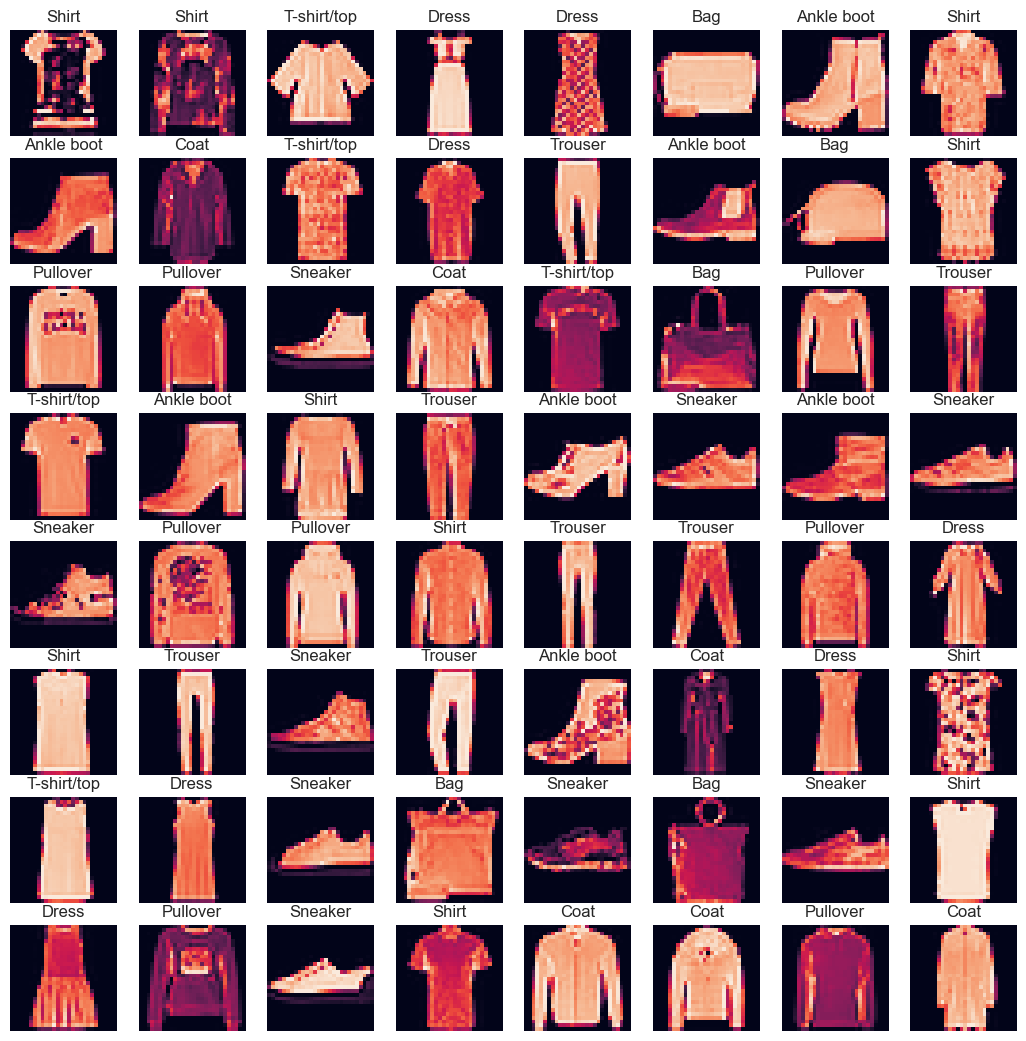

In [19]:
fig, axes = plt.subplots(8, 8)
fig.set_size_inches(13, 13)
for ax in axes.flatten():
    rand_index = int(np.random.randint(low=0, high=50000, size=1))
    ax.axis("off")
    ax.set_title(classes[int(y_train[rand_index])])
    ax.imshow(x_train[rand_index])
plt.show()

# Data Preprocessing

**TASK 3: Normalize the X train and X test data by dividing by the max value of the image arrays.**

In [20]:
x_train[5].min()

np.uint8(0)

In [21]:
x_train[5].max()

np.uint8(255)

In [22]:
# Normalize image pixels

x_train = x_train.astype("float32")
x_test = x_test.astype("float32")
x_train /= 255
x_test /= 255

In [23]:
x_train[5].min()

np.float32(0.0)

In [24]:
x_train[5].max()

np.float32(1.0)

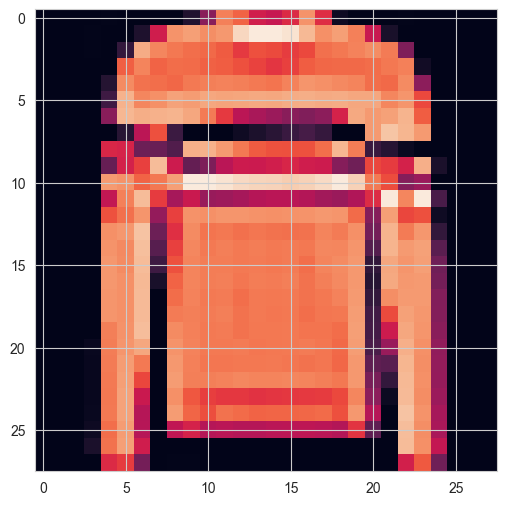

In [25]:
plt.imshow(x_train[5])
plt.show()

**Task 4: Reshape the X arrays to include a 4 dimension of the single channel. Similar to what we did for the numbers MNIST data set.**

In [26]:
x_train.shape, x_test.shape

((60000, 28, 28), (10000, 28, 28))

In [27]:
np.expand_dims(x_train, 3).shape

(60000, 28, 28, 1)

In [28]:
# Add 1 extra dimension of the single channel for the batch
x_train = np.expand_dims(x_train, 3)
x_test = np.expand_dims(x_test, 3)

In [29]:
x_train.shape, x_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

**TASK 5: Convert the y_train and y_test values to be one-hot encoded for categorical analysis by Keras.**

In [30]:
from sklearn.preprocessing import OneHotEncoder

In [31]:
encoder = OneHotEncoder(sparse_output=False)

In [32]:
# Reshape y_train and y_test to 2D arrays (required by OneHotEncoder)
y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

In [33]:
# Fit and transform y_train
y_train_onehot = encoder.fit_transform(y_train)

# Transform y_test using the same encoder
y_test_onehot = encoder.fit_transform(y_test)

print("y_train_onehot:\n", y_train_onehot)
print("y_test_onehot:\n", y_test_onehot)

# x_train & y_train

y_train_onehot:
 [[0. 0. 0. ... 0. 0. 1.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
y_test_onehot:
 [[0. 0. 0. ... 0. 0. 1.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 1. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


# Modeling

In [34]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout

## Create the model

**TASK 5: Use Keras to create a model consisting of at least the following layers (but feel free to experiment):**

* 2D Convolutional Layer, filters=28 and kernel_size=(3,3)
* Pooling Layer where pool_size = (2,2) strides=(1,1)

* Flatten Layer
* Dense Layer (128 Neurons, but feel free to play around with this value), RELU activation

* Final Dense Layer of 10 Neurons with a softmax activation

**Then compile the model with these parameters: loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy']**

In [35]:
x_train.shape, x_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [36]:
y_train.shape, y_test.shape

((60000, 1), (10000, 1))

In [37]:
model = Sequential()

model.add(
    Conv2D(
        filters=28, 
        kernel_size=(3, 3), 
        input_shape=(28, 28, 1), 
        activation="relu")
)  

model.add(MaxPool2D(pool_size=(2, 2), strides=(1,1)))  

##########################

model.add(Flatten())

##########################

model.add(Dense(128, activation="relu"))

##########################

model.add(Dense(10, activation="softmax"))

model.compile(loss="categorical_crossentropy", optimizer="rmsprop", metrics=["accuracy"])

/opt/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [38]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 28)     │           280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 25, 25, 28)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 17500)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     2,240,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,241,698 (8.55 MB)

 Trainable params: 2,241,698 (8.55 MB)

 Non-trainable params: 0 (0.00 B)

##  Model Training 

**TASK 6: Train/Fit the model to the x_train set by using EarlyStop. Amount of epochs is up to you.**

In [39]:
from tensorflow.keras.callbacks import EarlyStopping

In [40]:
early_stop = EarlyStopping(monitor="val_accuracy", patience=2, restore_best_weights=True)

In [41]:
model.fit(
    x_train,
    y_train_onehot,
    batch_size=32,
    epochs=20,
    validation_data=(x_test, y_test_onehot),
    callbacks=[early_stop],
)

Epoch 1/20
1873/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8144 - loss: 0.5312

2025-02-28 14:29:09.026689: E tensorflow/core/framework/node_def_util.cc:676] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_15}}
2025-02-28 14:29:09.027568: E tensorflow/core/framework/node_def_util.cc:676] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.8145 - loss: 0.5310 - val_accuracy: 0.8818 - val_loss: 0.3343
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.9024 - loss: 0.2707 - val_accuracy: 0.8942 - val_loss: 0.2966
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.9198 - loss: 0.2192 - val_accuracy: 0.8986 - val_loss: 0.2910
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.9339 - loss: 0.1832 - val_accuracy: 0.9030 - val_loss: 0.3035
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.9460 - loss: 0.1546 - val_accuracy: 0.9020 - val_loss: 0.3258
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.9551 - loss: 0.1318 - val_accuracy: 0.8933 - val_loss: 0.3890


**TASK 7: Plot values of metrics you used in your model.**

In [42]:
model.metrics_names

['loss', 'compile_metrics']

In [43]:
summary = pd.DataFrame(model.history.history)
summary.head(10)

,accuracy,loss,val_accuracy,val_loss
0,0.862,0.388,0.882,0.334
1,0.908,0.256,0.894,0.297
2,0.925,0.209,0.899,0.291
3,0.938,0.175,0.903,0.303
4,0.949,0.149,0.902,0.326
5,0.957,0.127,0.893,0.389


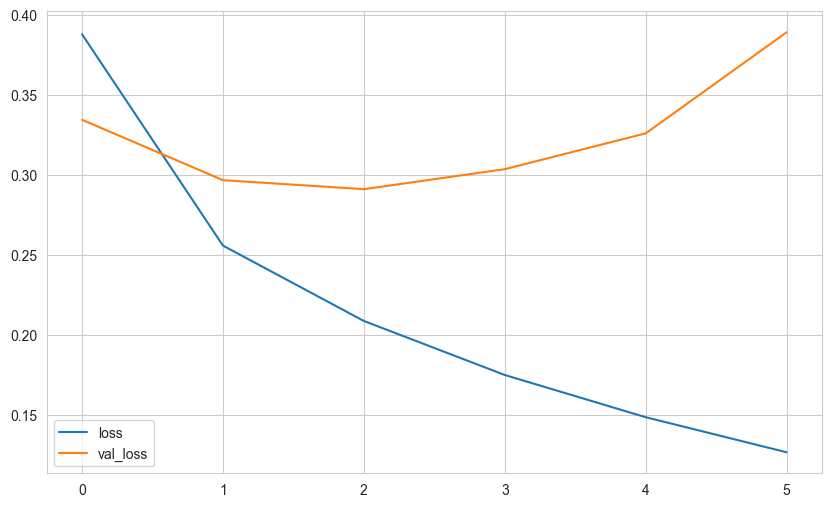

In [44]:
summary[["loss", "val_loss"]].plot()
plt.show()

## Model Evaluation

**TASK 8: Show the accuracy,precision,recall,f1-score the model achieved on the x_test data set. Keep in mind, there are quite a few ways to do this, but we recommend following the same procedure we showed in the MNIST lecture.**

In [45]:
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    multilabel_confusion_matrix,
)

In [47]:
model.evaluate(x_test, y_test_onehot)

 79/313 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9045 - loss: 0.3071

2025-02-28 14:32:24.787808: E tensorflow/core/framework/node_def_util.cc:676] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_15}}
2025-02-28 14:32:24.788095: E tensorflow/core/framework/node_def_util.cc:676] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9019 - loss: 0.3119


[0.3034638464450836, 0.902999997138977]

In [49]:
score = model.evaluate(x_test, y_test_onehot, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

2025-02-28 14:32:40.555734: E tensorflow/core/framework/node_def_util.cc:676] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_15}}
2025-02-28 14:32:40.556057: E tensorflow/core/framework/node_def_util.cc:676] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),

Test loss: 0.3034638464450836
Test accuracy: 0.902999997138977


In [50]:
pred_prob = model.predict(x_test)
pred_prob

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([[6.15279205e-09, 4.69861317e-10, 4.89444503e-08, ...,
        1.12875081e-04, 6.89072133e-09, 9.99724209e-01],
       [1.64006469e-05, 1.64227168e-16, 9.99983370e-01, ...,
        4.23095531e-10, 3.15270483e-11, 1.04169754e-12],
       [3.48479745e-10, 1.00000000e+00, 2.42447507e-10, ...,
        1.78939474e-10, 1.23541255e-11, 1.72392943e-13],
       ...,
       [3.45442118e-07, 2.70932148e-08, 1.00660154e-05, ...,
        2.95501053e-07, 9.99925733e-01, 5.46843770e-09],
       [3.39628298e-10, 9.99999881e-01, 3.86253113e-10, ...,
        2.33503022e-10, 8.27909952e-13, 1.95796199e-10],
       [1.89619182e-04, 1.53868677e-05, 6.03561802e-03, ...,
        1.42119080e-01, 1.06756808e-03, 2.86470586e-03]],
      shape=(10000, 10), dtype=float32)

In [51]:
pred_prob.shape

(10000, 10)

In [52]:
pred_prob[0]

array([6.1527921e-09, 4.6986132e-10, 4.8944450e-08, 1.1672284e-10,
       4.4244830e-10, 1.6268931e-04, 1.8714968e-07, 1.1287508e-04,
       6.8907213e-09, 9.9972421e-01], dtype=float32)

In [53]:
np.argmax(pred_prob[0])

np.int64(9)

In [54]:
y_pred = np.argmax(pred_prob, axis=1)
y_pred

array([9, 2, 1, ..., 8, 1, 5], shape=(10000,))

In [55]:
y_pred.shape

(10000,)

In [56]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.88      0.87      1000
           1       0.98      0.99      0.98      1000
           2       0.78      0.89      0.83      1000
           3       0.90      0.92      0.91      1000
           4       0.80      0.89      0.84      1000
           5       0.98      0.97      0.98      1000
           6       0.86      0.59      0.70      1000
           7       0.93      0.98      0.96      1000
           8       0.98      0.98      0.98      1000
           9       0.98      0.94      0.96      1000

    accuracy                           0.90     10000
   macro avg       0.91      0.90      0.90     10000
weighted avg       0.91      0.90      0.90     10000



In [57]:
print(confusion_matrix(y_test, y_pred))

[[879   3  32  20   5   2  55   1   3   0]
 [  1 988   2   6   1   0   1   0   1   0]
 [ 20   1 888  11  63   0  17   0   0   0]
 [ 10  15  15 917  35   0   8   0   0   0]
 [  0   2  83  17 887   0  11   0   0   0]
 [  0   0   0   0   0 971   0  22   0   7]
 [116   1 120  41 116   0 595   0  11   0]
 [  0   0   0   0   0   4   0 984   0  12]
 [  2   1   5   5   4   3   1   3 976   0]
 [  0   0   0   0   0   7   0  47   1 945]]


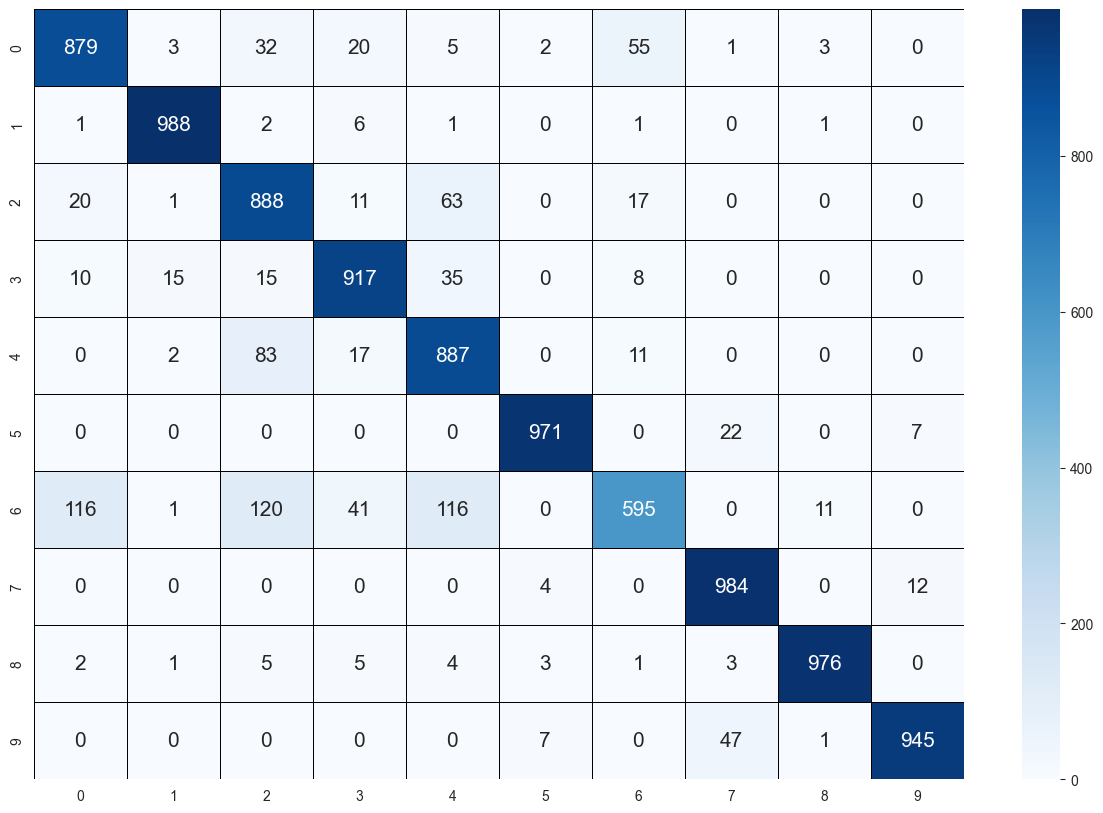

In [58]:
plt.figure(figsize=(15, 10))
sns.heatmap(
    confusion_matrix(y_test, y_pred),
    annot=True,
    cmap="Blues",
    linewidths=0.5,
    linecolor="black",
    fmt="g",
    annot_kws={"size": 15},
)
plt.show()

In [59]:
# y_test != y_pred
np.not_equal(y_test, y_pred)

array([[False,  True,  True, ...,  True,  True,  True],
       [ True, False,  True, ...,  True,  True,  True],
       [ True,  True, False, ...,  True, False,  True],
       ...,
       [ True,  True,  True, ..., False,  True,  True],
       [ True,  True, False, ...,  True, False,  True],
       [ True,  True,  True, ...,  True,  True, False]],
      shape=(10000, 10000))

In [60]:
# (y_test != y_pred).sum()
np.not_equal(y_test, y_pred).sum()

np.int64(90000000)

In [61]:
np.equal(y_test, y_pred).sum()

np.int64(10000000)

## Prediction

In [62]:
my_item = x_test[3]

In [63]:
my_item.shape

(28, 28, 1)

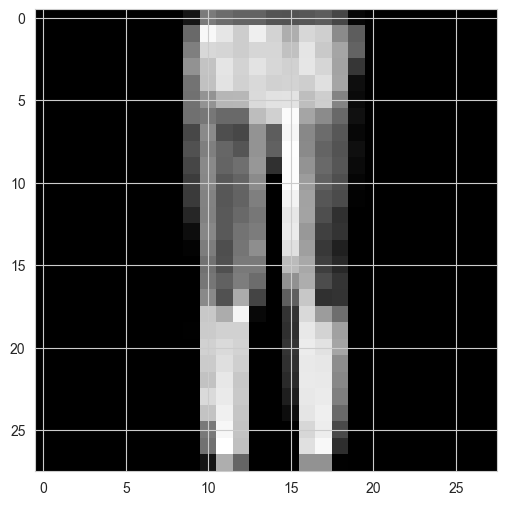

In [64]:
plt.imshow(my_item, cmap="gray")
plt.show()

# End of Assignment

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___